In [1]:
%load_ext tensorboard
import muspy as mp
import numpy as np
import torch
import matplotlib.pyplot as plt

import torch.utils.tensorboard as tb

In [2]:
import sys
sys.path.append(sys.path[0] + "/..")
import models.rnn_gan as rnn_gan
import lib.pitch_duration_event_representation as repr_pde
import lib.continous_pd_representation as repr_cpd

In [3]:
import importlib
importlib.reload(rnn_gan)
importlib.reload(repr_pde)
importlib.reload(repr_cpd)

<module 'lib.continous_pd_representation' from '/home/ignacy/dev/py/mir/exploration/../lib/continous_pd_representation.py'>

In [4]:
ds_muspy = mp.datasets.EssenFolkSongDatabase("../data")
print(len(ds_muspy))

9034


In [7]:
# for music in ds_muspy:
# {len(music.time_signatures) for music in ds_muspy}
# for i, music in enumerate(ds_muspy):
#     if len(music.time_signatures) == 29:
#         print(music.metadata.title)
#         print(music.metadata.source_format)
#         print(i)
#         print(music.time_signatures)
idx = 200
ds_muspy[idx].write_midi(f"../data_out/{idx}.mid")

In [8]:
# for music in ds_muspy:
# {len(music.time_signatures) for music in ds_muspy}
for i, music in enumerate(ds_muspy):
    if len(music.time_signatures) == 29:
        print(i)
        print(music.time_signatures)

425
[TimeSignature(time=0, numerator=4, denominator=4), TimeSignature(time=144, numerator=3, denominator=4), TimeSignature(time=744, numerator=1, denominator=4), TimeSignature(time=816, numerator=3, denominator=4), TimeSignature(time=1032, numerator=3, denominator=4), TimeSignature(time=1296, numerator=1, denominator=4), TimeSignature(time=1368, numerator=4, denominator=4), TimeSignature(time=1608, numerator=3, denominator=4), TimeSignature(time=1872, numerator=1, denominator=4), TimeSignature(time=1944, numerator=4, denominator=4), TimeSignature(time=2184, numerator=3, denominator=4), TimeSignature(time=2448, numerator=1, denominator=4), TimeSignature(time=2520, numerator=3, denominator=4), TimeSignature(time=2736, numerator=3, denominator=4), TimeSignature(time=3000, numerator=1, denominator=4), TimeSignature(time=3072, numerator=3, denominator=4), TimeSignature(time=3288, numerator=3, denominator=4), TimeSignature(time=3552, numerator=1, denominator=4), TimeSignature(time=3624, nume

In [9]:
durations = set()
for music in ds_muspy:
    for note in music.tracks[0]:
        durations.add(note.duration) 
print(sorted(durations))

[2, 3, 4, 6, 8, 9, 12, 15, 16, 18, 21, 24, 28, 30, 32, 36, 40, 42, 48, 54, 60, 64, 66, 72, 78, 84, 90, 96, 108, 120, 132, 138, 144, 156, 168, 192, 240, 252, 264, 288, 336, 372, 384, 1332]


In [14]:
music = ds_muspy[425]
music.print()

metadata:
  schema_version: '0.2'
  title: Shixuxie
  source_format: abc
resolution: 24
tempos:
- time: 0
  qpm: 120.0
key_signatures:
- time: 0
  root: 2
  mode: major
  fifths: 2
time_signatures:
- time: 0
  numerator: 4
  denominator: 4
- time: 144
  numerator: 3
  denominator: 4
- time: 744
  numerator: 1
  denominator: 4
- time: 816
  numerator: 3
  denominator: 4
- time: 1032
  numerator: 3
  denominator: 4
- time: 1296
  numerator: 1
  denominator: 4
- time: 1368
  numerator: 4
  denominator: 4
- time: 1608
  numerator: 3
  denominator: 4
- time: 1872
  numerator: 1
  denominator: 4
- time: 1944
  numerator: 4
  denominator: 4
- time: 2184
  numerator: 3
  denominator: 4
- time: 2448
  numerator: 1
  denominator: 4
- time: 2520
  numerator: 3
  denominator: 4
- time: 2736
  numerator: 3
  denominator: 4
- time: 3000
  numerator: 1
  denominator: 4
- time: 3072
  numerator: 3
  denominator: 4
- time: 3288
  numerator: 3
  denominator: 4
- time: 3552
  numerator: 1
  denominator: 

In [10]:
mp.to_note_representation(ds_muspy[0], encode_velocity=False)[:, 1]

array([74, 69, 72, 74, 74, 69, 72, 74, 79, 72, 69, 67, 69, 72, 74, 79, 74,
       72, 69, 72, 69, 67, 64, 62, 67, 66, 67, 67, 69, 72, 74, 74, 72, 74,
       67, 62, 69, 72, 74, 79, 74, 72, 69, 72, 69, 67, 64, 62, 74, 72, 69,
       67, 69, 72, 74, 79, 74, 72, 69, 72, 69, 67, 64, 62])

In [11]:
cpd_converter = repr_cpd.ContinuesPitchDurationConverter(ds_muspy)

In [59]:
import music21 as m21

ds_muspy[10].to_note_representation()


def to_m21_stream(pitches: list[int], durations: list[int], resolution=24) -> m21.stream.Stream:
    stream = m21.stream.Stream()
    for pitch, duration in zip(pitches, durations):
        note = m21.note.Note()
        note.pitch = m21.pitch.Pitch(pitch)
        note.duration = m21.duration.Duration(duration / resolution)
        stream.append(note)
    return stream

In [73]:
code = cpd_converter.to_representation(ds_muspy[10])
notes = cpd_converter.from_representation(code).T
code
P
D

array([[ 0.2972973 , -0.72093023],
       [ 0.2972973 , -0.72093023],
       [ 0.02702703, -0.72093023],
       [ 0.02702703, -0.86046512],
       [ 0.13513514, -0.86046512],
       [ 0.2972973 , -0.72093023],
       [ 0.2972973 , -0.72093023],
       [ 0.02702703, -0.72093023],
       [ 0.02702703, -0.86046512],
       [ 0.13513514, -0.86046512],
       [ 0.18918919, -0.72093023],
       [ 0.18918919, -0.86046512],
       [ 0.2972973 , -0.86046512],
       [ 0.56756757, -0.72093023],
       [ 0.40540541, -0.72093023],
       [ 0.2972973 , -0.1627907 ],
       [ 0.18918919, -0.72093023],
       [ 0.18918919, -0.86046512],
       [ 0.2972973 , -0.86046512],
       [ 0.56756757, -0.72093023],
       [ 0.40540541, -0.72093023],
       [ 0.2972973 , -0.1627907 ],
       [ 0.02702703, -0.72093023],
       [ 0.2972973 , -0.72093023],
       [ 0.13513514, -0.72093023],
       [ 0.02702703, -0.72093023],
       [-0.08108108, -0.72093023],
       [-0.08108108, -0.72093023],
       [-0.24324324,

In [37]:
ds_muspy[0]
mp.from_note_representation(cpd_converter.from_representation(code).T).print()

metadata:
  schema_version: '0.2'
resolution: 24
tracks:
- program: 0
  is_drum: false
  notes:
  - time: 12
    pitch: 12
    duration: 12
    velocity: 6
  - time: 72
    pitch: 72
    duration: 67
    velocity: 67



In [70]:
pitches_str = "65 63 75 71 56 68 67 66 72 70 74 74 75 72 71 71 70 73"
durations_str = "4  8  8 40 36 12 12  9 16 16  9 12 12 24 12  9  8 16"

pitches_str = "57 59 70 65 68 70 65 70 68 73 74 62 73 69 66 72 71 69"
durations_str = "54 12 18 18 12 30 15 24 21 18 30 21 30 15 30  8 28 24"

pitches_str = "67 63 64 70 65 63 67 67 70 62 69 67 66 63 71 68 73 76"
durations_str = "12 24 16  6 42  2 15 12 16 18 21  9 36 21 15 16 16 30"

pitches = [int(x) for x in pitches_str.split(" ")]
durations = [int(x) for x in durations_str.split(" ") if x.isnumeric()]

stream = to_m21_stream(pitches, durations)
player = m21.midi.realtime.StreamPlayer(stream)
player.play()

True

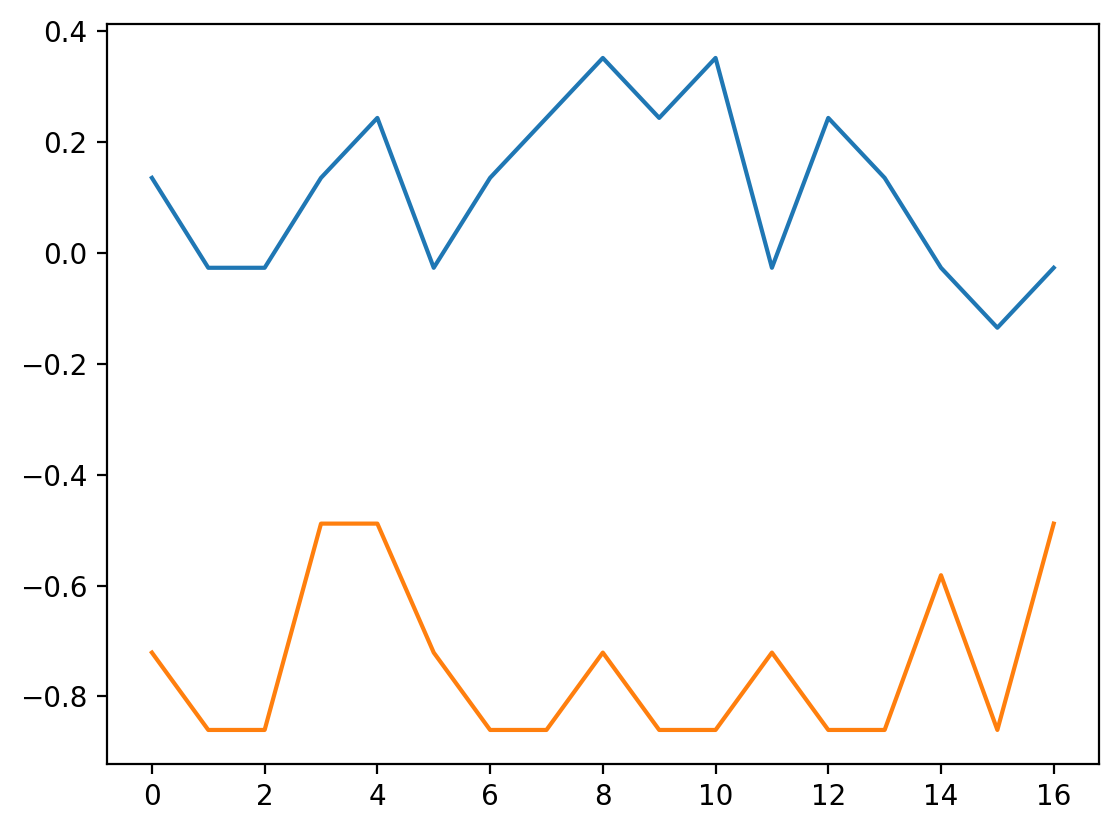

In [163]:
idx = 100
pd = cpd_converter.to_representation(ds_muspy[idx])
notes = ds_muspy[idx].to_note_representation()
# cpd_converter.from_representation(pd) == ds_muspy[300].to_note_representation()[:, 1]
decoded_notes = cpd_converter.from_representation(pd)
plt.plot(pd[:, 0])
plt.plot(pd[:, 1])
(decoded_notes == notes[:, 1:3]).all()

In [12]:
cpd_tensors = [
    torch.from_numpy(cpd_converter.to_representation(music))
    for music in ds_muspy
]

In [5]:
# df_events: list[np.ndarray] = []
# max_event = 0 
# for music in ds_muspy:
#     pd_event_representation = repr_pde.to_pitch_and_duration_event_representation(music)
#     df_events.append(pd_event_representation)
#     iter_max_event = np.max(pd_event_representation)
#     if iter_max_event > max_event:
#         max_event = iter_max_event

# tensor_events = [torch.from_numpy(e) for e in df_events]

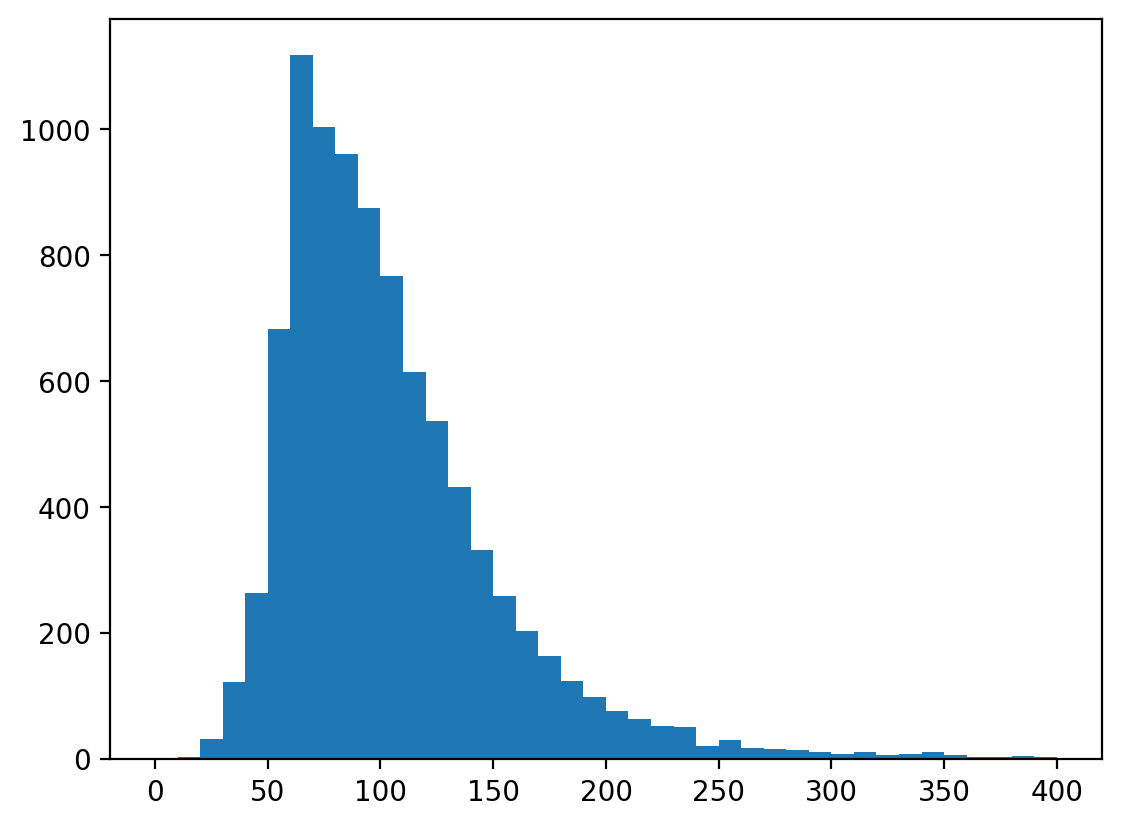

In [7]:
# lens = [len(events) for events in df_events]
# _ = plt.hist(lens, bins=range(0, 401, 10))

In [13]:
event_count = repr_pde.MAX_PD_EVENT + 1
generator = rnn_gan.Generator(2, random_dim=2, hidden_dim=20, num_layers=2, bidirectional=True)
discriminator = rnn_gan.Discriminator(2, hidden_dim=30, num_layers=2, bidirectional=False)

In [14]:
import torch.utils.data as tdata

trainer = rnn_gan.Trainer(
    generator=generator,
    discriminator=discriminator,
    generator_optimizer=torch.optim.Adam(generator.parameters(), lr=0.001),
    discriminator_optimizer=torch.optim.Adam(discriminator.parameters(), lr=0.001),
)

FAKE_LABEL = 0.0
REAL_LABEL = 1.0
train_dataset = rnn_gan.Dataset(cpd_tensors, event_count, random_noise_ratio=0.0)
train_dataloader = tdata.DataLoader(train_dataset, batch_size=10, shuffle=True, collate_fn=rnn_gan.seq_padding)

In [15]:
# music = repr_pde.from_pitch_and_duration_event_representation(train_dataset[0].argmax(dim=1))
# mp.write_midi("../data_out/short_gt", music)
# cpd_converter.from_representation(train_dataset[0].detach().numpy())
train_dataset[0].dtype

torch.float32

In [16]:
hit_rate_window = 10
correct_predictions = 0
total_checked = 0

global_step = 0
max_len = 0

writer = tb.SummaryWriter("../runs")
for epoch in range(15 * 12):
    if epoch % 5 == 0:
        max_len += 1
    train_dataset.max_len = max_len
    print("###################################")
    print(f"epoch: {epoch + 1}  max_len: {max_len}")
    for x_real, x_lens in train_dataloader:
        info = trainer.train_on_batch(x_real, x_lens, train_discriminator=True)

        ## info
        mean_preds_real = info.preds_real.mean().item()
        mean_preds_fake = info.preds_fake.mean().item()
        writer.add_scalar("preds/real_prediction", mean_preds_real, global_step)
        writer.add_scalar("preds/fake_prediction", mean_preds_fake, global_step)
        writer.add_scalar("preds/total", (mean_preds_real + 1 - mean_preds_fake) / 2, global_step)

        writer.add_scalar("loss/fake_discriminator", info.discriminator_loss_on_fake, global_step)
        writer.add_scalar("loss/real_discriminator", info.discriminator_loss_on_real, global_step)
        writer.add_scalar("loss/generator", info.generator_loss, global_step)
        global_step += 1

    for i in range(10):
        with torch.no_grad():
            pred_y = generator.forward(max_len, 1)[0].detach().numpy()
            try: 
                y = cpd_converter.from_representation(pred_y)
            except Exception:
                print(pred_y.T)
            else:
                print(y.T)


###################################
epoch: 1  max_len: 1


KeyboardInterrupt: 

In [497]:
pred_y = generator.forward(7, 1)[0].detach().numpy()
cpd_converter.from_representation(pred_y)

array([[ 71, 240],
       [ 66,   9],
       [ 67,  12],
       [ 67,  15],
       [ 68,  15],
       [ 69,  18],
       [ 68,  30]])

In [93]:
res = generator.forward(150, 1)
res.argmax(dim=2)

tensor([[125, 125, 105, 105, 105, 105, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
         223, 223, 223, 223, 223, 223, 223, 223, 223, 223]])

In [96]:
res.shape
event_count

228

In [167]:
# discriminator = Discriminator(356, 30, 30)
discriminator = Discriminator(max_event + 3, 30, 30)  # +2 from separator event and pad event
generator = Generator(max_event + 1, random_dim=30, hidden_dim=30, num_layers=2, bidirectional=True)

import random
random.shuffle(tensor_events)
train_ratio = 0.99
train_size = int(len(tensor_events) * train_ratio)

train_events = tensor_events[:train_size]
eval_events = tensor_events[train_size:]
print(len(train_events), len(eval_events))

train_dataset = DatasetForDiscriminator(model_distr, train_events, max_event)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, collate_fn=train_dataset.pad_batch)

eval_dataset = DatasetForDiscriminator(model_distr, eval_events, max_event)
eval_dataloader = torch.utils.data.DataLoader(eval_dataset, batch_size=len(eval_events), shuffle=False, collate_fn=train_dataset.pad_batch)

optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()

8943 91


In [ ]:
generator.train()
discriminator.train()

for epoch in range(5):
    running_loss = 0


In [169]:
discriminator.train()

iters_per_print = 10

for epoch in range(5):
    y: torch.Tensor
    running_loss = 0
    for i, ((x, x_lens), y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        print(x.shape)
        pred = discriminator.forward(x, x_lens)
        loss: torch.Tensor = criterion(pred, y.squeeze())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % iters_per_print == iters_per_print - 1:
            last_loss = running_loss / iters_per_print
            ev = eval(discriminator, eval_dataloader)
            print(f"{i+1:4} | loss: {last_loss:.2f} | eval: {ev:.2f}")
            writer.add_scalar("loss/avg", last_loss, i+1)
            writer.add_scalar("eval/eval", ev, i+1)
            running_loss = 0
            discriminator.train()

torch.Size([10, 383])
torch.Size([10, 269])
torch.Size([10, 230])
torch.Size([10, 312])
torch.Size([10, 392])
torch.Size([10, 385])


KeyboardInterrupt: 